# Molekulen dinamika

Atal honetan aztertuko dugu molekulen dinamika N gorputzen simulazio klasikoa eginez. Atomoen masa elektroien masa bainoz askoz handiagoa denez $Newton$-en legeak erabili ditzakegu beraien higidura ikertzeko tenperatura baxuetan. Gure helburua gasen zinetika eta propietate termikoak ikertzea da, horretarako atomo bakoitzaren higidura klasikoki aztertuko dugu eta gero lortuko ditugu propietate termikoak estatistikoki.

## Iterazio potentzialak

Molekulen dinamika N-gorputzen problema bat bezala aztertu dezakegu, non higudura ekuazioak $Newton$-en ekuazioak diren, hau da:
$$\dfrac{\vec{r_i}}{dt}=\vec{v_i}$$
$$\dfrac{\vec{v_i}}{dt}=\dfrac{1}{m_i}\sum\limits_{j\ne i}\vec{f_{ij}}$$
Non $\vec{f_{ij}}$ $i$ eta $j$ molekulen arteko indarra den. Normalean hartzen ditugu partikula identikoz osatutako sistemak, beraz beraien masa $m_i=m$ berdina izango da guztientzako.
Indar grabitazionala ez bezala naturan dauden potentzialak ezin dira idatzi zehazki, beraz normalean erabiltzen dira bi potentzial hurbilduak ala nola $Morse$ potentzaiala edo $Lennard-Jones$ potentziala. Guk gehien erabiliko dugun potentziala $Lennard-Jones$ potentziala izango da:
$$V(r)=V_0 [(\dfrac{r_0}{r})^{12}-2(\dfrac{r_0}{r})^6]$$


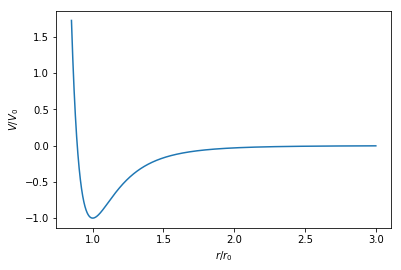

In [1]:
import matplotlib.pyplot as plt
import numpy as np

r=np.linspace(0.85,3.0,10000)
V=(1.0/r)**12-2.0*(1.0/r)**6
plt.figure()
plt.plot(r,V)
plt.xlabel('$r/r_0$')
plt.ylabel('$V/V_0$')
plt.show()

**Programa :** Lennard-Jones potentziala.

Non irudian ikusi dezakegun bezala $V_0$ konstante positibo bat den eta $r_0$ oreka distantzia den. Lehenengo $1/r^12$ terminoa elektroien arteko alderatze indarra deskribatzen du(Coulomb-en indarra eta Pauli esclusio printzipioa), bigarren terminoa $1/r^6$ distantzia handiko dipolo-dipolo elkartze indarra deskribatzen du(van der Waals indarra). Hau edukita $i.$ atomoak jasatzen duen indarra $j.$ atomoak eragindakoa kalkulatu dezakegu gradientea kalkulatuz:
$$\vec{f_{ij}}=-\Delta V=12 \dfrac{V_0}{r_0} [(\dfrac{r_0}{r_{ij}})^6-1](\dfrac{r_0}{r_{ij}})^8\dfrac{\vec{r_{ij}}}{r_0}$$
Non $\vec{r_{ij}}=\vec{r_{i}}-\vec{r_{j}}$ $i$ eta $j$ atomoen arteko posizio erlatiboa den eta $r_{ij}=\left |\vec{r_{i}}-\vec{r_{j}} \right |$ bekoteraren modulua den. Behin hau dugula higidura ekuazioak ebatzi ditzakegu. Aurrera jarraitu baino lehen erabiliko ditugun unitateak definituko ditugu, egingo dugun aukeraketarekin lortuko ditugun emaitzak unibertsalak izango dira, masaren eta $LJ$ potentzialaren parametroen funtzioan egongo direlako:

|energia|luzera|masa|denbora|abiadura|indarra   
-|-|-|-|-|-|
Unitateak|$V_0$|$r_0$|m|$r_0(m/V_0)^{1/2}$|$(V_0/m)^{1/2}$|$m/r_0$

**Taula 1 :** Erabiliko ditugun untitateak.

## Muga baldintza periodikoak

Molekulen dinamikaren simulazioa egin aurretik muga baldintza egokiak aukeratu behar ditugu. Aurreko ataletan bezala muga baldintza periodikoak aukeratu ditzakegu, gure sistemaren kopia birtualak eratuz honen inguruan. Modu honetan edozein partikularentzako edukiko dugu beste bat posizio erlatibo berekin eta abiadura berdinarekin. Aukeraketa hau egiten badugu, partikula bat gure sistematik irtetzen bada beste bat sartuko da. Baina honekin arazo bat daukagu, partikula bat gure sistematik ateratzen denean eta beste bat sartzean sisteman dauden beste partikulek pairatzen duten energia potentziala aldatzen da asko,$r\to r'$ aldaketa gertatzen baita $r'<r$ izanik. Honek sortzen du jauzi bat potentzialean eta indarrean. Honek eragingo duena da gure sistema hustuko dela.

Baina, partikula batetik bestera dagoen distatzia $r$ bada eta bere partikula birtualara dagoen distantzia $r'$ bada, beti aukaretzen badugu bi hauen arteko txikiena, indarran dagoen etena ekidituko dugu. Hau da, beti aukeratu behar dugu distantziarik txikiena $x-x_r$ eta $x-x_{r'}$ artean. Fisikoki esan nahi duena da, partikula batek beti aukeratzen duela bere posiziotik hurbilen dagoena, erreala edo kopia birtuala izan. Honi ondoko-hurbilen elkarrekintza deituko diogu.

Hau eginda erraz ikusi dezakegu bi partikulen arteko distantziarik handiena sistemaren luzeraren erdia izango dela. Beraz $L$ sistemaren luzera(x ardatzean) izanda eta $\Delta =x_1-x_2$ izanda, $ \left | \Delta x \right |\le 1/2L$ bada distantzia hau onartuko dugu, baina ez bada betetzen ondorengo aldaketa egin behar dugu:
$$\Delta x \to \left\{ \begin{array}{c} \Delta x -L&,&\Delta x>\dfrac{1}{2}L \\ \Delta x +L&,&\Delta x<\dfrac{1}{2}L \end{array}\right. $$
Berdina egingo dugu y eta z norabideekin. Hauek izango dira gure muga baldintza periodikoak.

# Simulazioak

Behin muga baldintzak ditugula gure sistemaren dinamika simulatzen duen programa idatzi dezakegu:

In [ ]:
import ode
import random as rnd
import numpy as np,ivisual as vp

def ngorputz(id,r,v,t):
    if (id==0):
        return v
    a=np.zeros((N,3))
    for i in range(N):
        rij=r[i]-r[i+1:]
        rij[rij>HL]-=L
        rij[rij<-HL]+=L
        r2=np.sum(rij*rij,axis=1)
        r6=r2*r2*r2
        for k in [0,1,2]:
            fij=12.*(1.-r6)*rij[:,k]/(r6*r6*r2)
            a[i,k]+=np.sum(fij)
            a[i+1:,k]
    return a

L,N=10.0,32
atoms,HL,t,h=[],L/2.,0.,0.002
r,v=np.zeros((N,3)),np.zeros((N,3))

scene=vp.display(background=(.2,.5,1),center=(L/2,L/3,L/2))
vp.box(pos=(HL,HL,HL),length=L,height=L,width=L,opacity=0.3)
for i in range(N):
    for k in range(3):
        r[i,k]=L*rnd.random()
        v[i,k]=1-2*rnd.random()
    if (i==3):
        atoms.append(vp.sphere(pos=r[i],radius=0.04*L,color=(1,1,1)))
    else:
        atoms.append(vp.sphere(pos=r[i],radius=0.04*L,color=(1,0,1)))

v-=np.sum(v,axis=0)/N

while True:
    vp.rate(1000)
    r,v=ode.leapfrog(ngorputz,r,v,t,h)
    r[r>L]-=L
    r[r<0.]+=L
    for i in range(N):
        atoms[i].pos=r[i]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Programa :** N gorputzen dinamika.

Behin hau dugula, programa hau aldatu dezakegu gure partikulen sistemaren abiaduren diagrama irudikatzeko. Hau egitean ikusten dugu nola $Boltzman$-en distribuzioarekin bat datorren, teoriak aurresaten duen modura. Bestalde hemendik atera dezakegu sistemaren tenperatura, gogoratuz honelako sistemetan hurrengoa dugula:
$$\dfrac{1}{2}m\langle v^2\rangle=\dfrac{3}{2}kT$$
au egiten badugu ondorengo emaitza lortzen dugu:

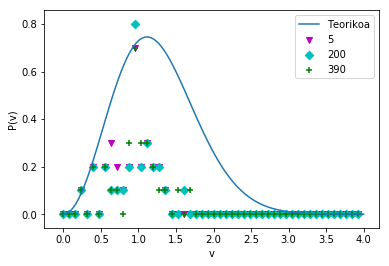

In [4]:
import ode
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

def ngorputz(id,r,v,t):
    if (id==0):
        return v
    a=np.zeros((N,3))
    for i in range(N):
        rij=r[i]-r[i+1:]
        rij[rij>HL]-=L
        rij[rij<-HL]+=L
        r2=np.sum(rij*rij,axis=1)
        r6=r2*r2*r2
        for k in [0,1,2]:
            fij=12.*(1.-r6)*rij[:,k]/(r6*r6*r2)
            a[i,k]+=np.sum(fij)
            a[i+1:,k]
    return a

L,N=10.0,32
atoms,HL,t,h=[],L/2.,0.,0.002
r,v=np.zeros((N,3)),np.zeros((N,3))
fig=plt.figure()

for i in range(N):
    for k in range(3):
        r[i,k]=L*rnd.random()
        v[i,k]=1-2*rnd.random()
        

v-=np.sum(v,axis=0)/N

for k in range(400):
    #hacer desde t=0 a t=400*h
    r,v=ode.leapfrog(ngorputz,r,v,t,h)
    r[r>L]-=L
    r[r<0.]+=L
    if (k==5):
        v2=np.sum(v*v,axis=1)
        speed=np.sqrt(v2)
        speedbin=np.histogram(speed,bins=50,range=(0,4))

        x=[]
        for i in range(50):
            x.append(speedbin[1][i])
        plt.scatter(x,speedbin[0]/10,marker='v',color='m',label=k)
    if (k==200):
        v2=np.sum(v*v,axis=1)
        speed=np.sqrt(v2)
        speedbin=np.histogram(speed,bins=50,range=(0,4))

        x=[]
        for i in range(50):
            x.append(speedbin[1][i])
        plt.scatter(x,speedbin[0]/10,marker='D',color='c',label=k)
    if (k==390):
        v2=np.sum(v*v,axis=1)
        speed=np.sqrt(v2)
        speedbin=np.histogram(speed,bins=50,range=(0,4))

        x=[]
        for i in range(50):
            x.append(speedbin[1][i])
        plt.scatter(x,speedbin[0]/10,marker='+',color='g',label=k)
    x=0.0

vteo=np.linspace(0.,4.0,100)    
norm=4.0*np.pi*(1.0/(1.24*np.pi))**1.5
plt.plot(vteo,norm*vteo*vteo*np.exp(-vteo*vteo/1.24),label='Teorikoa')
ax=fig.add_subplot(111)
ax.legend(loc='upper right')
ax.set_xlabel('v')
ax.set_ylabel('P(v)')
plt.show()

Hemendik lehen esan dugun modura gure sistemaren tenperatura lortu dezakegu $m=1.0$ hartuz:

In [5]:
vbat=np.mean(speed)
print(vbat/3.0)

2035481885.81


$$\langle v^2\rangle\simeq 103.41m^2/s^2\Rightarrow kT\simeq 0.62 J$$